In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_palette("flare")

import sklearn.linear_model as lm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler


# Diabetes and Health Indicators Classification

### Background

In an era where chronic diseases pose an escalating threat to public health, the imperative for accurate and timely diagnosis becomes increasingly crucial. Among these, diabetes stands out as a prevalent and pervasive ailment that affects millions worldwide. According to the World Health Organization (WHO), the global prevalence of diabetes has nearly doubled since 1980, with an estimated 422 million adults living with the condition in 2014. Additionally, an alarming number of individuals are on the verge of developing diabetes, residing in the realm of prediabetes, a precursor to the full-fledged disease.

This machine learning project aims to address the pressing need for effective diabetes prediction by leveraging advanced computational techniques on data collected through the 2015 CDC telephone survey. The dataset, a comprehensive compilation of health indicators and lifestyle factors, serves as a valuable resource to discern patterns and relationships that can contribute to a robust predictive model.

By harnessing the power of machine learning algorithms, we aspire to develop a classification system capable of accurately categorizing individuals into distinct groups: those with diabetes, those in a prediabetic state, and those without diabetes. The significance of such a predictive model is underscored by its potential to facilitate early intervention, personalized healthcare strategies, and preventive measures. Timely identification of individuals at risk can lead to targeted interventions, thereby mitigating the adverse effects of diabetes and reducing the burden on healthcare systems.

This project not only showcases the integration of cutting-edge technology into healthcare but also underscores its practical implications for society. As we delve into the analysis of this rich dataset, we aim to unravel the intricate interplay between health indicators and lifestyle choices, ultimately contributing to a data-driven paradigm for diabetes risk assessment. Through this initiative, we aspire to make strides in the ongoing battle against diabetes, fostering a future where predictive analytics plays a pivotal role in safeguarding public health.

# 1 Understanding the Data

This machine learning project hinges on a curated dataset sourced from the 2015 Behavioral Risk Factor Surveillance System (BRFSS) telephone survey conducted by the CDC. This dataset condenses responses from 253,680 individuals into 22 columns, with one column, "Diabetes_012," serving as the target variable. The target variable encompasses three classes: 0 (no diabetes or diabetes only during pregnancy), 1 (prediabetes), and 2 (diabetes).

The dataset, initially comprising 330 features, is tailored for analysis with 21 numerical feature variables. These features encapsulate diverse health indicators and lifestyle factors, providing a comprehensive snapshot of respondents' health profiles. Notably, categorical variables are pre-encoded for seamless integration into machine learning algorithms.

It's crucial to acknowledge a class imbalance in the target variable, necessitating careful consideration during model development and evaluation. Despite its challenges, this dataset holds promise for unraveling patterns and correlations, contributing meaningfully to the field of predictive healthcare analytics. The condensed nature of the data and its numerical format facilitate a focused exploration, paving the way for a robust classification model for diabetes.

### 1.1 Read in the data

In [3]:
files = os.listdir("data")
files = [file for file in files if '.csv' in file]
data = pd.read_csv(f"data/{files[0]}")

### 1.2 Exploring the Dataset

In [4]:
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
data.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [7]:
data.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

### 1.3 Visualise the Data

In [8]:
columns = [col for col in data.columns]
columns.remove('Diabetes_012')
X = data[columns]
y = data['Diabetes_012']

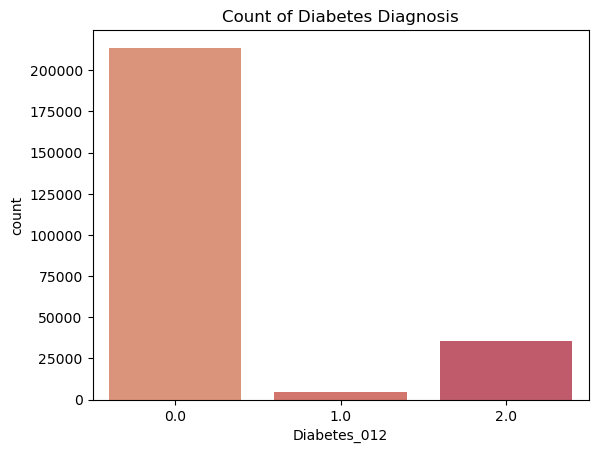

In [9]:
sns.countplot(x='Diabetes_012', data=data)
plt.title('Count of Diabetes Diagnosis')
plt.show()

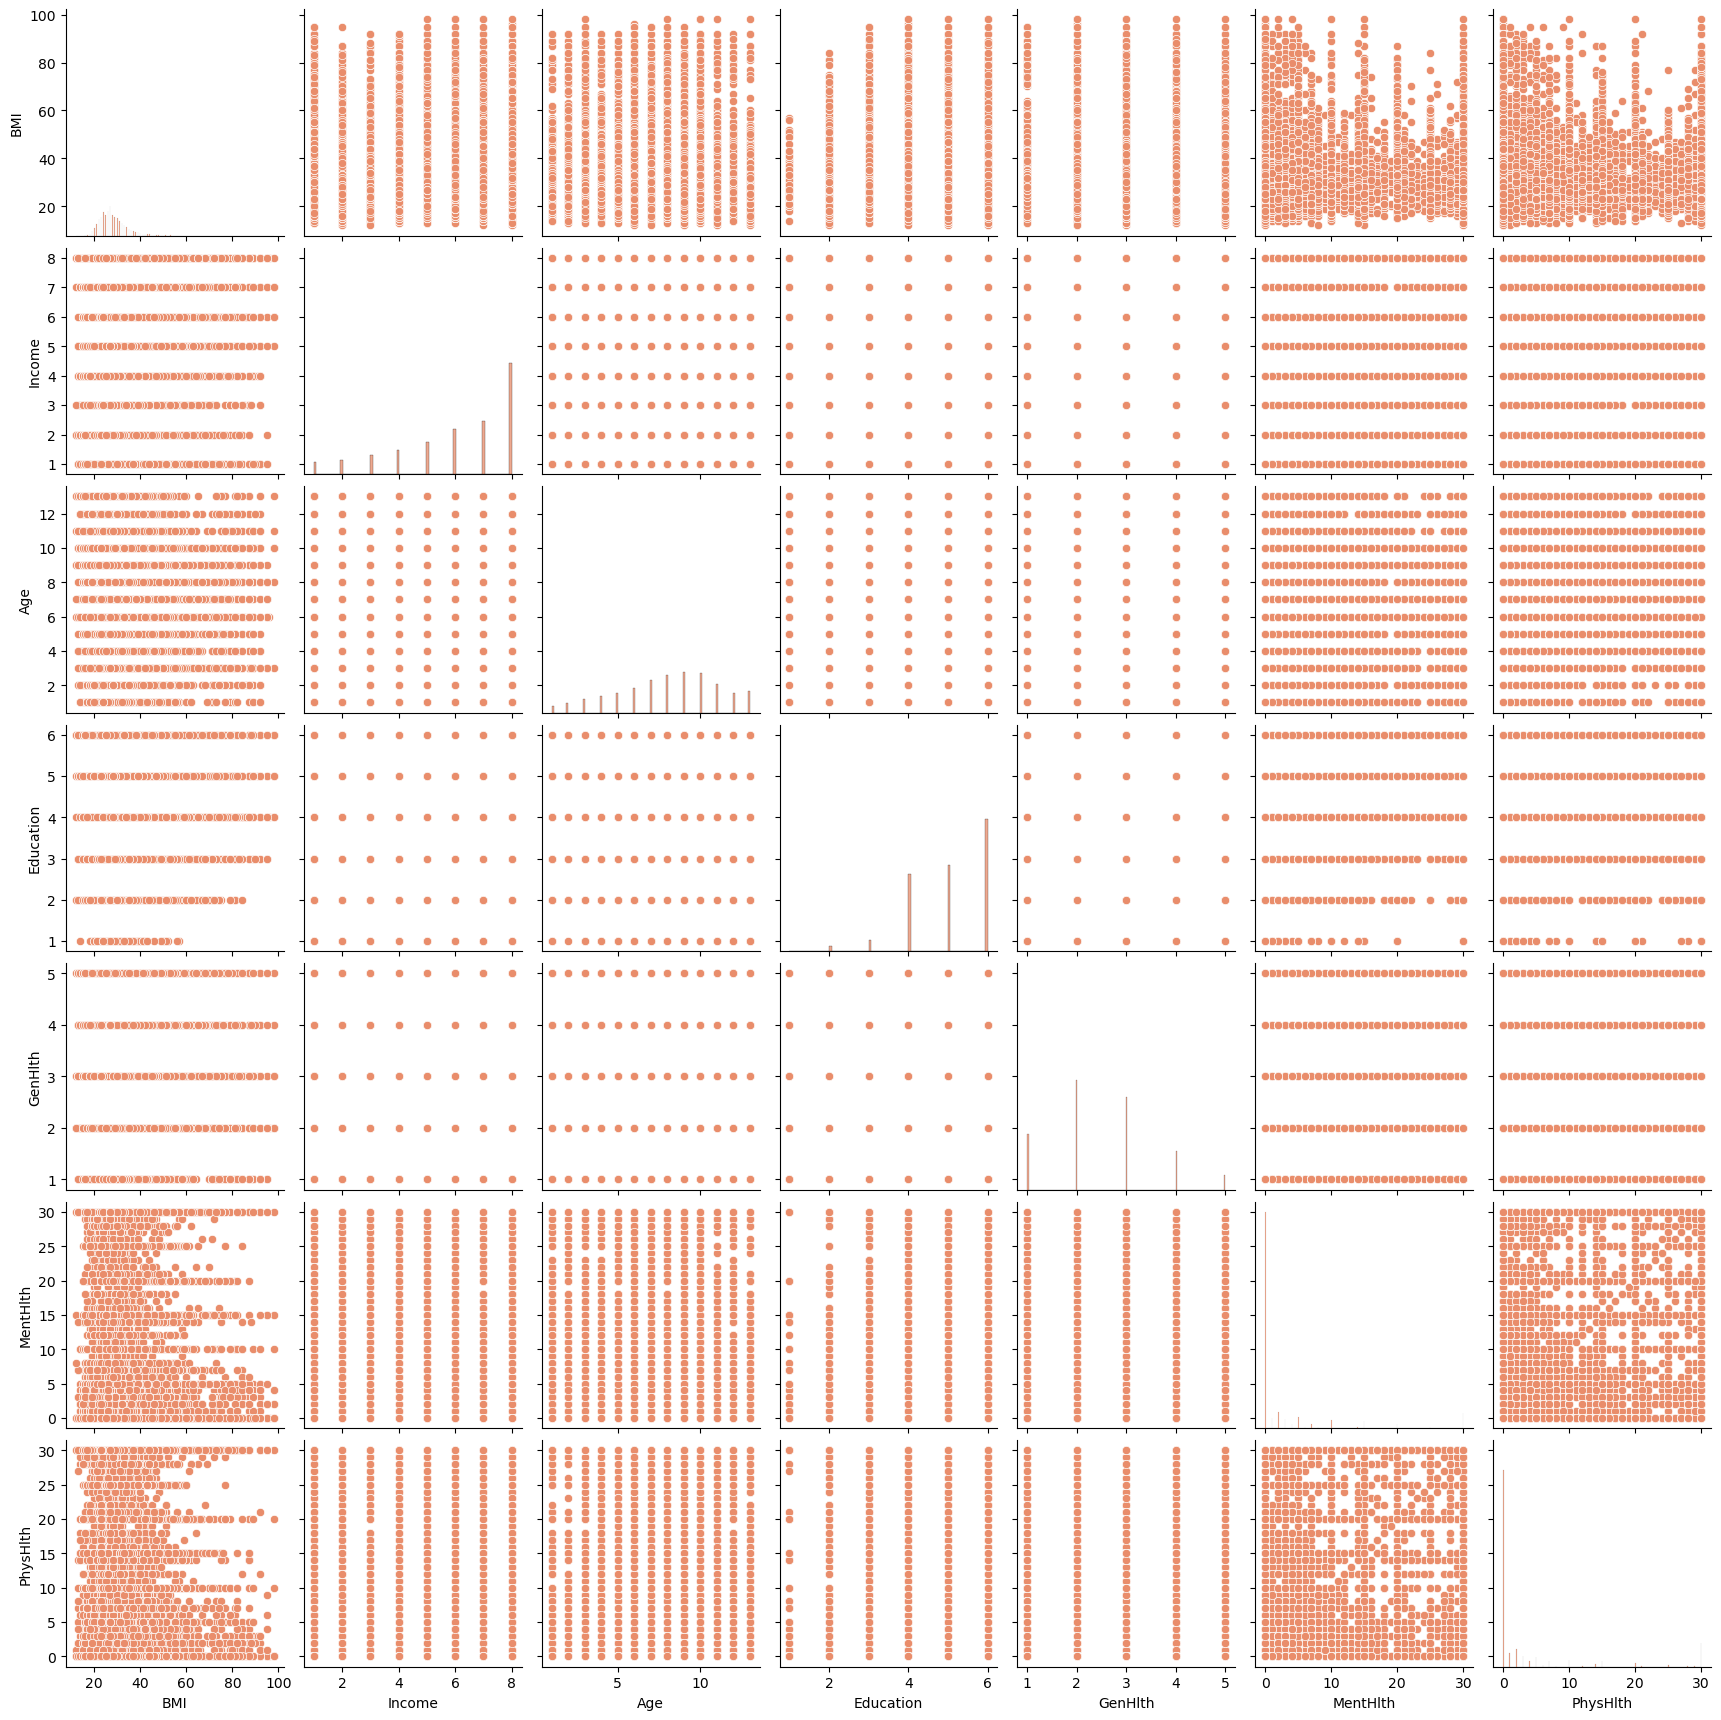

In [10]:
sns.pairplot(data[['BMI','Income','Age','Education','GenHlth','MentHlth','PhysHlth']])

# 2 Addressing Class Imbalance

### 2.1 Oversampling

In [11]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X,y)

<Axes: xlabel='Diabetes_012', ylabel='count'>

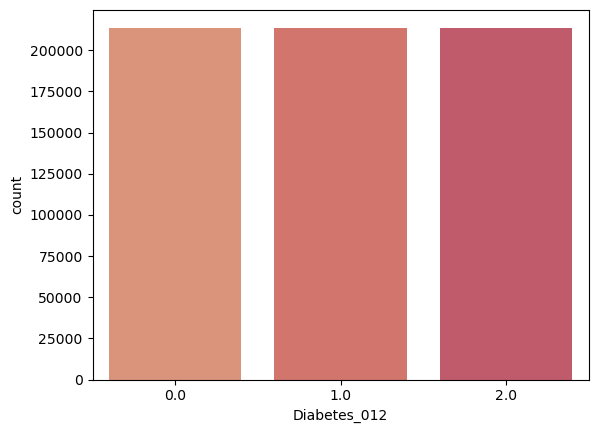

In [12]:
sns.countplot(x=y_ros)

### 2.2 Undersampling

In [13]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X,y)

<Axes: xlabel='Diabetes_012', ylabel='count'>

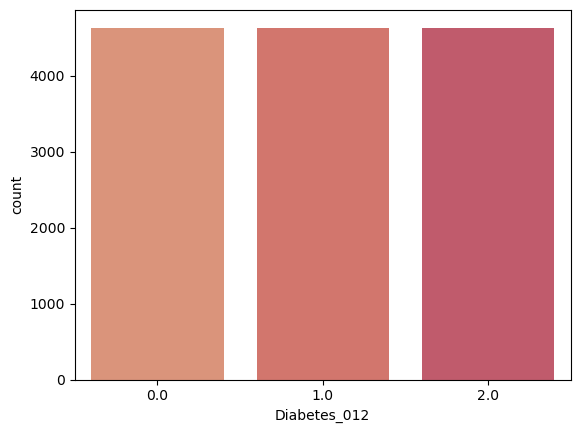

In [14]:
sns.countplot(x=y_rus)

### 2.3 SMOTE (Synthetic Minority Oversampling Technique)

In [15]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X,y)

<Axes: xlabel='Diabetes_012', ylabel='count'>

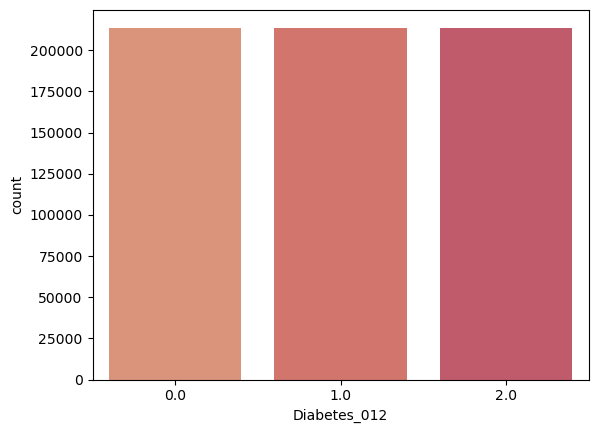

In [16]:
sns.countplot(x=y_smote)

# 3 Models

### 3.1 Baseline (no pre-processing)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

In [18]:
model = lm.LogisticRegression(penalty=None,solver='lbfgs',max_iter=5000)
model.fit(X_train,y_train)
print("Intercept: ",model.intercept_)
print("Coefficients: ",model.coef_)
print("Iterations: ", model.n_iter_)

Intercept:  [ 5.19368365 -2.51121151 -2.68247214]
Coefficients:  [[-3.75738886e-01 -3.70927440e-01 -7.34613546e-01 -3.85434786e-02
   1.28797334e-02 -2.03018791e-02 -6.33107865e-02  2.09512660e-02
   2.24563014e-02  4.95902276e-02  3.14273582e-01  2.26957606e-02
  -1.40848326e-01 -2.84440483e-01 -1.71300888e-03  4.65679025e-03
  -5.09893436e-02 -1.30551119e-01 -8.25767344e-02  4.00171675e-02
   3.64060449e-02]
 [-1.13919938e-02  1.58718034e-01  1.83306100e-01  1.35285302e-02
  -1.84405224e-02 -1.08365195e-01 -1.08952651e-01  1.03985557e-02
   3.59623544e-04 -5.69386370e-02  1.49585591e-01 -8.01634714e-02
   2.50185970e-01  2.43039165e-02  6.51897160e-03 -1.35820579e-03
  -4.25545686e-02 -2.36588195e-03  3.96331878e-02 -3.93885657e-02
  -2.13102803e-02]
 [ 3.87130880e-01  2.12209406e-01  5.51307446e-01  2.50149484e-02
   5.56078899e-03  1.28667074e-01  1.72263437e-01 -3.13498218e-02
  -2.28159250e-02  7.34840932e-03 -4.63859173e-01  5.74677108e-02
  -1.09337644e-01  2.60136567e-01 -4.80

In [19]:
y_pred = model.predict(X_test)
len(y_pred) == len(X_test)

True

In [20]:
cm = classification_report(model.predict(X_test),
                      y_test,
                      target_names=['None','Pre-Diabetes','Diabetes'])

print(cm)


              precision    recall  f1-score   support

        None       0.98      0.86      0.92     72611
Pre-Diabetes       0.00      0.00      0.00         0
    Diabetes       0.18      0.53      0.27      3493

    accuracy                           0.85     76104
   macro avg       0.38      0.46      0.39     76104
weighted avg       0.94      0.85      0.89     76104



c:\Users\AnnalisaSmith\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AnnalisaSmith\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\AnnalisaSmith\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


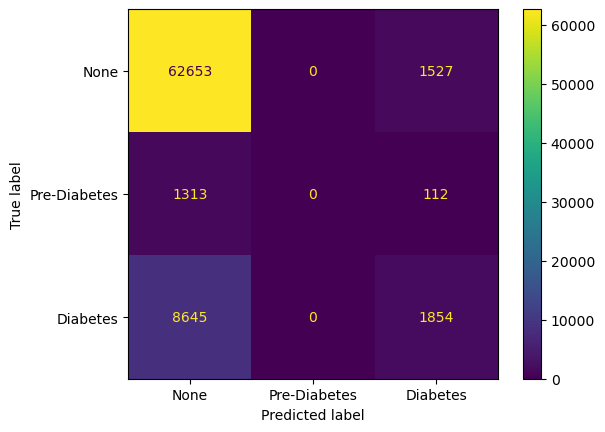

In [21]:
cm2 = confusion_matrix(y_test,model.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=('None','Pre-Diabetes','Diabetes'))
disp.plot()


### 3.2 Oversampling

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_ros,
                                                    y_ros,
                                                    test_size=0.3,
                                                    random_state=42)

model_ros = lm.LogisticRegression(penalty=None,solver='lbfgs',max_iter=5000)

model_ros.fit(X_train,y_train)

print("Intercept: ",model_ros.intercept_)
print("Coefficients: ",model_ros.coef_)
print("Iterations: ", model_ros.n_iter_)


Intercept:  [ 3.84134632 -0.58186433 -3.25948199]
Coefficients:  [[-3.64468032e-01 -3.98947921e-01 -7.23343350e-01 -4.77615716e-02
   9.10723588e-03 -2.40600172e-02 -7.27657661e-02  3.66822968e-02
   2.66901616e-02  2.73433352e-02  3.24629033e-01 -7.26471134e-03
  -1.89553182e-01 -3.14697758e-01 -1.41052155e-03  3.93987346e-03
  -1.01075514e-02 -1.23011462e-01 -1.03683909e-01  3.47523142e-02
   4.85486705e-02]
 [-1.19261667e-02  1.81517901e-01  1.10260421e-01  1.59316361e-02
  -9.17473000e-03 -1.08913677e-01 -9.74310728e-02  9.60055449e-04
   3.20832614e-03 -2.33754830e-02  1.56193742e-01 -6.20229682e-02
   2.34545549e-01  2.70827112e-02  5.69691177e-03 -8.11377946e-04
  -6.42590032e-02 -2.05058337e-02  4.39216381e-02 -3.83770782e-02
  -2.93082365e-02]
 [ 3.76394199e-01  2.17430020e-01  6.13082929e-01  3.18299355e-02
   6.74941159e-05  1.32973694e-01  1.70196839e-01 -3.76423523e-02
  -2.98984877e-02 -3.96785220e-03 -4.80822775e-01  6.92876796e-02
  -4.49923667e-02  2.87615047e-01 -4.28

              precision    recall  f1-score   support

        None       0.66      0.59      0.63     71293
Pre-Diabetes       0.32      0.43      0.37     46781
    Diabetes       0.59      0.51      0.54     74259

    accuracy                           0.52    192333
   macro avg       0.52      0.51      0.51    192333
weighted avg       0.55      0.52      0.53    192333



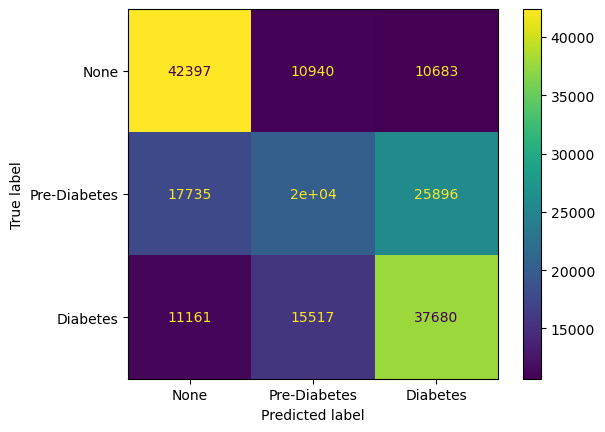

In [23]:
y_pred = model_ros.predict(X_test)

len(y_pred) == len(X_test)

cm = classification_report(model_ros.predict(X_test),
                      y_test,
                      target_names=['None','Pre-Diabetes','Diabetes'])

print(cm)

cm2 = confusion_matrix(y_test,model_ros.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=('None','Pre-Diabetes','Diabetes'))
disp.plot()


### 3.3 Undersampling

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_rus,
                                                    y_rus,
                                                    test_size=0.3,
                                                    random_state=42)

model_rus = lm.LogisticRegression(penalty=None,solver='lbfgs',max_iter=5000)

model_rus.fit(X_train,y_train)

print("Intercept: ",model_rus.intercept_)
print("Coefficients: ",model_rus.coef_)
print("Iterations: ", model_rus.n_iter_)

Intercept:  [ 3.80890647 -0.69289271 -3.11601376]
Coefficients:  [[-4.26154297e-01 -3.59549299e-01 -7.93307107e-01 -4.94241461e-02
  -3.34397797e-02  1.77362035e-01 -9.99695300e-02  3.39208497e-02
   2.73665923e-02 -1.83277616e-02  3.01128313e-01  5.69839526e-02
  -1.26765970e-01 -2.94622544e-01 -4.81538118e-04  5.52820045e-03
  -8.65876639e-02 -8.07051547e-02 -1.02714592e-01  4.30446104e-02
   5.30842676e-02]
 [-3.96867413e-02  1.74356118e-01  1.85352754e-01  1.57382097e-02
   4.85402196e-02 -2.33294265e-01 -7.24433499e-02 -2.77643915e-02
   1.75613427e-02 -2.64736618e-02  1.38290079e-01 -3.76642383e-02
   2.09075625e-01  3.53360360e-02  5.19114468e-03 -2.26095548e-03
  -4.28312361e-02 -5.27429501e-02  4.61748043e-02 -3.13888663e-02
  -3.34467019e-02]
 [ 4.65841038e-01  1.85193182e-01  6.07954353e-01  3.36859363e-02
  -1.51004399e-02  5.59322304e-02  1.72412880e-01 -6.15645818e-03
  -4.49279350e-02  4.48014233e-02 -4.39418393e-01 -1.93197143e-02
  -8.23096548e-02  2.59286508e-01 -4.70

              precision    recall  f1-score   support

        None       0.65      0.59      0.62      1533
Pre-Diabetes       0.29      0.42      0.34       955
    Diabetes       0.63      0.52      0.57      1680

    accuracy                           0.52      4168
   macro avg       0.52      0.51      0.51      4168
weighted avg       0.56      0.52      0.53      4168



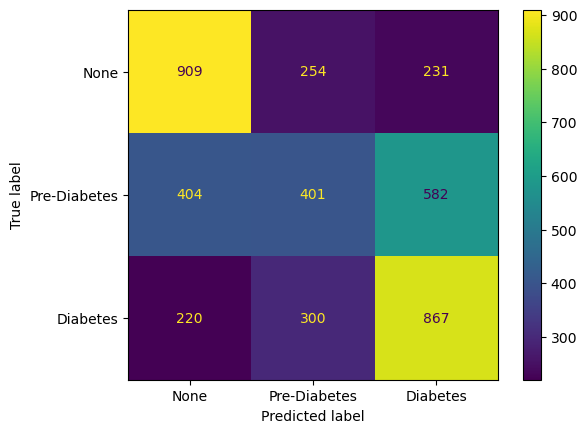

In [25]:

y_pred = model_rus.predict(X_test)

len(y_pred) == len(X_test)

cm = classification_report(model_rus.predict(X_test),
                      y_test,
                      target_names=['None','Pre-Diabetes','Diabetes'])

print(cm)

cm2 = confusion_matrix(y_test,model_rus.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=('None','Pre-Diabetes','Diabetes'))
disp.plot()


### 3.4 SMOTE

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_smote,
                                                    y_smote,
                                                    test_size=0.3,
                                                    random_state=42)

model_smote = lm.LogisticRegression(penalty=None,solver='lbfgs',max_iter=5000)

model_smote.fit(X_train,y_train)

print("Intercept: ",model_smote.intercept_)
print("Coefficients: ",model_smote.coef_)
print("Iterations: ", model_smote.n_iter_)

Intercept:  [ 4.54868503 -0.75973129 -3.78895374]
Coefficients:  [[-4.57289593e-01 -4.98813192e-01 -9.35886993e-01 -4.68388097e-02
   3.05076005e-02  1.34891672e-01  3.32838661e-02 -2.29921589e-02
  -5.88596649e-03 -3.98581581e-02  5.82194027e-01 -1.14897067e-01
  -1.34708359e-01 -3.81890713e-01 -1.63128687e-03  6.15330287e-03
   4.81772970e-02 -1.43679674e-01 -1.04610433e-01  2.35380445e-02
   4.98555152e-02]
 [-2.58428397e-02  2.30968138e-01  1.74047685e-01  1.60779442e-02
  -3.46900855e-02 -2.02805130e-01 -1.63772624e-01  2.83656064e-02
   1.14225545e-02 -5.50464442e-03  1.26387143e-01 -6.11989824e-02
   2.81261256e-01  2.69987779e-02  5.62577766e-03  1.25926302e-04
  -1.06835621e-01 -1.81625439e-02  4.86905879e-02 -2.84849391e-02
  -2.93356629e-02]
 [ 4.83132433e-01  2.67845054e-01  7.61839309e-01  3.07608655e-02
   4.18248495e-03  6.79134574e-02  1.30488758e-01 -5.37344757e-03
  -5.53658804e-03  4.53628025e-02 -7.08581170e-01  1.76096049e-01
  -1.46552897e-01  3.54891935e-01 -3.99

              precision    recall  f1-score   support

        None       0.66      0.61      0.63     68919
Pre-Diabetes       0.34      0.45      0.38     47900
    Diabetes       0.61      0.52      0.56     75514

    accuracy                           0.53    192333
   macro avg       0.53      0.53      0.53    192333
weighted avg       0.56      0.53      0.54    192333



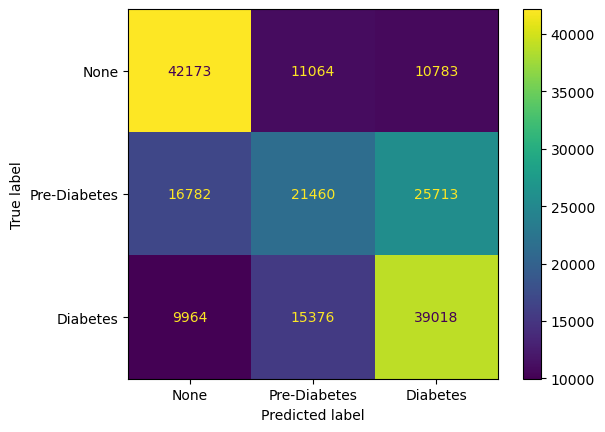

In [27]:

y_pred = model_rus.predict(X_test)

len(y_pred) == len(X_test)

cm = classification_report(model_smote.predict(X_test),
                      y_test,
                      target_names=['None','Pre-Diabetes','Diabetes'])

print(cm)

cm2 = confusion_matrix(y_test,model_smote.predict(X_test))

disp = ConfusionMatrixDisplay(confusion_matrix=cm2,
                              display_labels=('None','Pre-Diabetes','Diabetes'))
disp.plot()
